Importar Librerias

In [242]:
import datetime as dt
import meteomatics.api as api
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import pickle
from env import creds

In [243]:
username = creds.username
password = creds.password

Establecer parametros para el llamado al API. En este caso se establece para un año en una coordenada en el municipio de General Teran en Nuevo Leon, ya que es una de las zonas con mayor agricultura del Estado

In [244]:
now = dt.datetime.utcnow().replace(hour=0, minute=0, second=0, microsecond=0)
startdate_ts = '2023-10-05T00:00:00+00:00'
startdate_ts = dt.datetime.strptime(startdate_ts, '%Y-%m-%dT%H:%M:%S%z')
enddate_ts = startdate_ts + dt.timedelta(days=365)
interval_ts = dt.timedelta(hours=1)

In [245]:
coordinates_ts = [(25.25863754474608, -99.68200619248428)]

In [246]:
parameters_ts = ['grass_land_temperature_sum:C',
                  'evapotranspiration_24h:mm', 
                  'leaf_wetness:idx', 
                  'soil_moisture_index_-5cm:idx',
                    'volumetric_soil_water_-5cm:m3m3',
                    'soil_moisture_index_-15cm:idx',
                    'volumetric_soil_water_-15cm:m3m3', 
                    'soil_moisture_index_-50cm:idx', 
                    'volumetric_soil_water_-50cm:m3m3']

Se hace el llamado al API de Meteomatics

In [247]:
print("DataFrame Agricultural Parameters:")
try:
    df = api.query_time_series(coordinates_ts, startdate_ts, enddate_ts, interval_ts,
                                  parameters_ts, username, password)
    print (df.head())
except Exception as e:
    print("Failed, the exception is {}".format(e))

DataFrame Agricultural Parameters:
                                        grass_land_temperature_sum:C  \
lat   lon    validdate                                                 
25.26 -99.68 2023-10-05 00:00:00+00:00                       6801.40   
             2023-10-05 01:00:00+00:00                       6801.40   
             2023-10-05 02:00:00+00:00                       6801.40   
             2023-10-05 03:00:00+00:00                       6801.40   
             2023-10-05 04:00:00+00:00                       6801.40   

                                        evapotranspiration_24h:mm  \
lat   lon    validdate                                              
25.26 -99.68 2023-10-05 00:00:00+00:00                       5.66   
             2023-10-05 01:00:00+00:00                       5.72   
             2023-10-05 02:00:00+00:00                       5.72   
             2023-10-05 03:00:00+00:00                       5.73   
             2023-10-05 04:00:00+00:00        

In [248]:
df.shape

(8761, 9)

In [249]:
df.head()

grass_land_temperature_sum:C  \
lat   lon    validdate                                                 
25.26 -99.68 2023-10-05 00:00:00+00:00                       6801.40   
             2023-10-05 01:00:00+00:00                       6801.40   
             2023-10-05 02:00:00+00:00                       6801.40   
             2023-10-05 03:00:00+00:00                       6801.40   
             2023-10-05 04:00:00+00:00                       6801.40   

                                        evapotranspiration_24h:mm  \
lat   lon    validdate                                              
25.26 -99.68 2023-10-05 00:00:00+00:00                       5.66   
             2023-10-05 01:00:00+00:00                       5.72   
             2023-10-05 02:00:00+00:00                       5.72   
             2023-10-05 03:00:00+00:00                       5.73   
             2023-10-05 04:00:00+00:00                       5.75   

                                        leaf_wetness:idx  \
lat   lon    validdate                                     
25.26 -99.68 2023-10-05 00:00:00+00:00              0.00   
             2023-10-05 01:00:00+00:00              0.00   
             2023-10-05 02:00:00+00:00              0.00   
             2023-10-05 03:00:00+00:00              0.00   
             2023-10-05 04:00:00+00:00              0.00   

                                        soil_moisture_index_-5cm:idx  \
lat   lon    validdate                                                 
25.26 -99.68 2023-10-05 00:00:00+00:00                          0.00   
             2023-10-05 01:00:00+00:00                          0.00   
             2023-10-05 02:00:00+00:00                          0.00   
             2023-10-05 03:00:00+00:00                          0.00   
             2023-10-05 04:00:00+00:00                          0.00   

                                        volumetric_soil_water_-5cm:m3m3  \
lat   lon    validdate                                                    
25.26 -99.68 2023-10-05 00:00:00+00:00                             0.15   
             2023-10-05 01:00:00+00:00                             0.15   
             2023-10-05 02:00:00+00:00                             0.15   
             2023-10-05 03:00:00+00:00                             0.15   
             2023-10-05 04:00:00+00:00                             0.15   

                                        soil_moisture_index_-15cm:idx  \
lat   lon    validdate                                                  
25.26 -99.68 2023-10-05 00:00:00+00:00                           0.03   
             2023-10-05 01:00:00+00:00                           0.03   
             2023-10-05 02:00:00+00:00                           0.03   
             2023-10-05 03:00:00+00:00                           0.03   
             2023-10-05 04:00:00+00:00                           0.03   

                                        volumetric_soil_water_-15cm:m3m3  \
lat   lon    validdate                                                     
25.26 -99.68 2023-10-05 00:00:00+00:00                              0.16   
             2023-10-05 01:00:00+00:00                              0.16   
             2023-10-05 02:00:00+00:00                              0.16   
             2023-10-05 03:00:00+00:00                              0.16   
             2023-10-05 04:00:00+00:00                              0.16   

                                        soil_moisture_index_-50cm:idx  \
lat   lon    validdate                                                  
25.26 -99.68 2023-10-05 00:00:00+00:00                           0.00   
             2023-10-05 01:00:00+00:00                           0.00   
             2023-10-05 02:00:00+00:00                           0.00   
             2023-10-05 03:00:00+00:00                           0.00   
             2023-10-05 04:00:00+00:00                           0.00   

                                        vo

In [250]:
df = df.reset_index()
df.columns

Index(['lat', 'lon', 'validdate', 'grass_land_temperature_sum:C',
       'evapotranspiration_24h:mm', 'leaf_wetness:idx',
       'soil_moisture_index_-5cm:idx', 'volumetric_soil_water_-5cm:m3m3',
       'soil_moisture_index_-15cm:idx', 'volumetric_soil_water_-15cm:m3m3',
       'soil_moisture_index_-50cm:idx', 'volumetric_soil_water_-50cm:m3m3'],
      dtype='object')

In [251]:
df = df.drop(columns=['lat', 'lon'])
df.head()

,validdate,grass_land_temperature_sum:C,evapotranspiration_24h:mm,leaf_wetness:idx,soil_moisture_index_-5cm:idx,volumetric_soil_water_-5cm:m3m3,soil_moisture_index_-15cm:idx,volumetric_soil_water_-15cm:m3m3,soil_moisture_index_-50cm:idx,volumetric_soil_water_-50cm:m3m3
0,2023-10-05 00:00:00+00:00,6801.40,5.66,0.00,0.00,0.15,0.03,0.16,0.00,0.15
1,2023-10-05 01:00:00+00:00,6801.40,5.72,0.00,0.00,0.15,0.03,0.16,0.00,0.15
2,2023-10-05 02:00:00+00:00,6801.40,5.72,0.00,0.00,0.15,0.03,0.16,0.00,0.15
3,2023-10-05 03:00:00+00:00,6801.40,5.73,0.00,0.00,0.15,0.03,0.16,0.00,0.15
4,2023-10-05 04:00:00+00:00,6801.40,5.75,0.00,0.00,0.15,0.03,0.16,0.00,0.15


In [252]:
df2 = df.copy()
df2['validdate'] = pd.to_datetime(df2['validdate']).dt.date

# Step 2: Group by the 'validdate' and calculate the mean for all other numeric columns
df2 = df2.groupby('validdate').mean().reset_index()
df2.head()

,validdate,grass_land_temperature_sum:C,evapotranspiration_24h:mm,leaf_wetness:idx,soil_moisture_index_-5cm:idx,volumetric_soil_water_-5cm:m3m3,soil_moisture_index_-15cm:idx,volumetric_soil_water_-15cm:m3m3,soil_moisture_index_-50cm:idx,volumetric_soil_water_-50cm:m3m3
0,2023-10-05,6801.40,5.78,0.08,0.02,0.15,0.04,0.16,0.00,0.15
1,2023-10-06,6832.10,3.88,0.62,1.16,0.38,0.37,0.23,0.00,0.15
2,2023-10-07,6855.30,2.34,0.12,0.89,0.33,0.52,0.26,0.02,0.15
3,2023-10-08,6878.60,2.07,0.71,0.93,0.33,0.54,0.26,0.03,0.15
4,2023-10-09,6897.50,1.28,0.33,0.81,0.31,0.54,0.27,0.04,0.15


In [253]:
df_suelo = df2.copy()
df_suelo = df_suelo.rename(columns={'validdate': 'Fecha', 'grass_land_temperature_sum:C': 'Grass Land Temperature', 'evapotranspiration_24h:mm': 'Evapotranspiration', 'leaf_wetness:idx': 'Leaf Wetness', 'soil_moisture_index_-5cm:idx': 'Soil Moisture Index -5cm', 'volumetric_soil_water_-5cm:m3m3': 'Volumetric Soil Water -5cm (m3/m3)', 'soil_moisture_index_-15cm:idx': 'Soil Moisture Index -15cm', 'volumetric_soil_water_-15cm:m3m3': 'Volumetric Soil Water -15cm (m3/m3)', 'soil_moisture_index_-50cm:idx': 'Soil Moisture Index -50cm', 'volumetric_soil_water_-50cm:m3m3': 'Volumetric Soil Water -50cm (m3/m3)'})
df_suelo.head()

,Fecha,Grass Land Temperature,Evapotranspiration,Leaf Wetness,Soil Moisture Index -5cm,Volumetric Soil Water -5cm (m3/m3),Soil Moisture Index -15cm,Volumetric Soil Water -15cm (m3/m3),Soil Moisture Index -50cm,Volumetric Soil Water -50cm (m3/m3)
0,2023-10-05,6801.40,5.78,0.08,0.02,0.15,0.04,0.16,0.00,0.15
1,2023-10-06,6832.10,3.88,0.62,1.16,0.38,0.37,0.23,0.00,0.15
2,2023-10-07,6855.30,2.34,0.12,0.89,0.33,0.52,0.26,0.02,0.15
3,2023-10-08,6878.60,2.07,0.71,0.93,0.33,0.54,0.26,0.03,0.15
4,2023-10-09,6897.50,1.28,0.33,0.81,0.31,0.54,0.27,0.04,0.15


In [287]:
df_suelo.tail()

,Fecha,Grass Land Temperature,Evapotranspiration,Leaf Wetness,Soil Moisture Index -5cm,Volumetric Soil Water -5cm (m3/m3),Soil Moisture Index -15cm,Volumetric Soil Water -15cm (m3/m3),Soil Moisture Index -50cm,Volumetric Soil Water -50cm (m3/m3)
361,2024-09-30,6430.10,3.45,0.12,0.21,0.20,0.43,0.24,0.43,0.24
362,2024-10-01,6455.50,4.74,0.29,0.17,0.19,0.41,0.24,0.42,0.24
363,2024-10-02,6481.30,4.96,0.08,0.13,0.18,0.37,0.23,0.42,0.24
364,2024-10-03,6507.10,4.55,0.04,0.09,0.17,0.34,0.22,0.42,0.24
365,2024-10-04,6532.10,4.87,0.00,0.07,0.17,0.32,0.22,0.41,0.23


In [288]:
LSTemp = pd.read_csv('LSTemp&Emis.csv')
LSTemp['Date'] = pd.to_datetime(LSTemp['Date']).dt.date
LSTemp.head()


,Date,Emission M14,Land Surface Temperature Day,Land Surface Temp Night
0,2023-10-05,0.49,0.00,298.40
1,2023-10-06,0.49,0.00,0.00
2,2023-10-07,0.49,0.00,0.00
3,2023-10-08,0.49,0.00,0.00
4,2023-10-09,0.49,0.00,0.00


In [289]:
df_final = pd.merge(df_suelo, LSTemp, how='left', left_on= 'Fecha', right_on='Date')
df_final.head()

,Fecha,Grass Land Temperature,Evapotranspiration,Leaf Wetness,Soil Moisture Index -5cm,Volumetric Soil Water -5cm (m3/m3),Soil Moisture Index -15cm,Volumetric Soil Water -15cm (m3/m3),Soil Moisture Index -50cm,Volumetric Soil Water -50cm (m3/m3),Date,Emission M14,Land Surface Temperature Day,Land Surface Temp Night
0,2023-10-05,6801.40,5.78,0.08,0.02,0.15,0.04,0.16,0.00,0.15,2023-10-05,0.49,0.00,298.40
1,2023-10-06,6832.10,3.88,0.62,1.16,0.38,0.37,0.23,0.00,0.15,2023-10-06,0.49,0.00,0.00
2,2023-10-07,6855.30,2.34,0.12,0.89,0.33,0.52,0.26,0.02,0.15,2023-10-07,0.49,0.00,0.00
3,2023-10-08,6878.60,2.07,0.71,0.93,0.33,0.54,0.26,0.03,0.15,2023-10-08,0.49,0.00,0.00
4,2023-10-09,6897.50,1.28,0.33,0.81,0.31,0.54,0.27,0.04,0.15,2023-10-09,0.49,0.00,0.00


In [290]:
df_final = df_final.drop(columns=['Date'])

In [291]:
corr_df = df_final.copy()
corr_df = corr_df.drop(columns=['Fecha'])

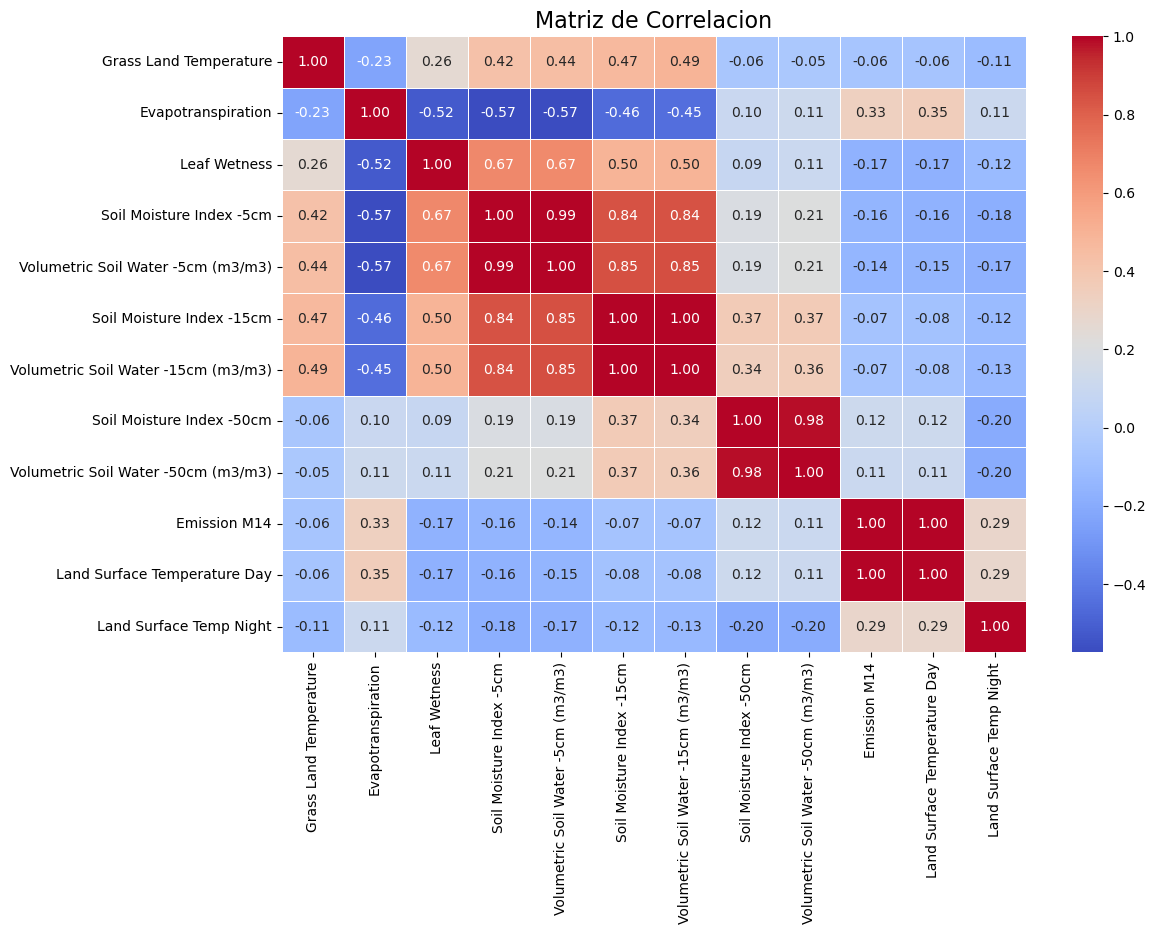

In [292]:
correlation_matrix = corr_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlacion', fontsize=16)
plt.show()

Se quitan los campos de Volumetric Soil Water, ya que estan altamente correlacionados con el campo de Soil Moisture

In [293]:
pred_df = corr_df.drop(columns=['Volumetric Soil Water -5cm (m3/m3)', 'Volumetric Soil Water -15cm (m3/m3)', 'Volumetric Soil Water -50cm (m3/m3)'])
pred_df.head()

,Grass Land Temperature,Evapotranspiration,Leaf Wetness,Soil Moisture Index -5cm,Soil Moisture Index -15cm,Soil Moisture Index -50cm,Emission M14,Land Surface Temperature Day,Land Surface Temp Night
0,6801.40,5.78,0.08,0.02,0.04,0.00,0.49,0.00,298.40
1,6832.10,3.88,0.62,1.16,0.37,0.00,0.49,0.00,0.00
2,6855.30,2.34,0.12,0.89,0.52,0.02,0.49,0.00,0.00
3,6878.60,2.07,0.71,0.93,0.54,0.03,0.49,0.00,0.00
4,6897.50,1.28,0.33,0.81,0.54,0.04,0.49,0.00,0.00


In [294]:
pred_df['Leaf Wetness'] = pred_df['Leaf Wetness'].round(0)
pred_df.fillna(0, inplace=True)

In [295]:
pred_df

,Grass Land Temperature,Evapotranspiration,Leaf Wetness,Soil Moisture Index -5cm,Soil Moisture Index -15cm,Soil Moisture Index -50cm,Emission M14,Land Surface Temperature Day,Land Surface Temp Night
0,6801.40,5.78,0.00,0.02,0.04,0.00,0.49,0.00,298.40
1,6832.10,3.88,1.00,1.16,0.37,0.00,0.49,0.00,0.00
2,6855.30,2.34,0.00,0.89,0.52,0.02,0.49,0.00,0.00
3,6878.60,2.07,1.00,0.93,0.54,0.03,0.49,0.00,0.00
4,6897.50,1.28,0.00,0.81,0.54,0.04,0.49,0.00,0.00
...,...,...,...,...,...,...,...,...,...
361,6430.10,3.45,0.00,0.21,0.43,0.43,0.98,316.42,294.60
362,6455.50,4.74,0.00,0.17,0.41,0.42,0.98,311.64,0.00
363,6481.30,4.96,0.00,0.13,0.37,0.42,0.98,313.26,0.00
364,6507.10,4.55,0.00,0.09,0.34,0.42,0.98,309.36,0.00


In [296]:
pred_df['Leaf Wetness'].value_counts()

Leaf Wetness
0.00    298
1.00     68
Name: count, dtype: int64

Se dividen los datos en la variable que se va a predecir y las variables que van a ayudar a la prediccion.

In [297]:
X = pred_df.drop(columns=['Leaf Wetness'])
y = pred_df['Leaf Wetness']

In [298]:
# Se dividen la informacion en datos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se utiliza la libreria Lazy Classifier para ver todos los modelos de clasificacion y elegir el mejor.

In [299]:
# Inicializar LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:00<00:00, 48.21it/s]

[LightGBM] [Info] Number of positive: 53, number of negative: 239
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 571
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181507 -> initscore=-1.506172
[LightGBM] [Info] Start training from score -1.506172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [300]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the classification report for more detailed metrics
report = classification_report(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.8784
F1 Score: 0.8798
Precision: 0.8817
Recall: 0.8784

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92        59
         1.0       0.69      0.73      0.71        15

    accuracy                           0.88        74
   macro avg       0.81      0.82      0.82        74
weighted avg       0.88      0.88      0.88        74



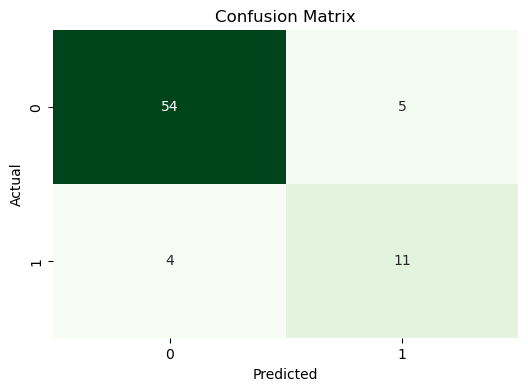

In [301]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Guardamos el modelo entrenado utilizando pickle

In [302]:
# Specify the file path to save the model
model_filename = 'Modelo_Pred_LeafWetness.pkl'

# Save the trained model to a file using pickle
with open(model_filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

print(f"Model saved successfully to {model_filename}")

Model saved successfully to Modelo_Pred_LeafWetness.pkl


Realizamos un analisis prescriptivo de la informacion, identificando las variables que afectan en mayor medida a nuestra variable predictora.